# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 30 de Septiembre, 2021 23:59
</div>

In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits import mplot3d

from ipywidgets import interact, fixed, widgets 

Populating the interactive namespace from numpy and matplotlib


## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [2]:
x,y,m,i,j = sym.symbols('x,y,m,i,j')
b=sym.symbols('beta')
b_0=sym.Indexed(b,0)
b_1=sym.Indexed(b,1)
J= sym.Function('J')
S=sym.Function('S')
S=sym.Sum((y**(i)-b_0-b_1*x**(i))**2,(i,1,m))
J=sym.Eq(J(b_0,b_1),(1/(2*m))*(S))
J

Eq(J(beta[0], beta[1]), Sum((-x**i*beta[1] + y**i - beta[0])**2, (i, 1, m))/(2*m))

Para este caso particular las derivadas nos deben de dar:

$$
\frac{\partial}{\partial \beta_0} \textbf{J}(\beta_0,\beta_1) = \frac{1}{m}\sum_{i=1}^{m}\left(\beta_0+\beta_1(x^{(i)})-y^{(i)}\right)
$$

$$
\frac{\partial}{\partial \beta_1} \textbf{J}(\beta_0,\beta_1) = \frac{1}{m}\sum_{i=1}^{m}\left(\beta_0+\beta_1(x^{(i)})-y^{(i)}\right)*x^{(i)}
$$


In [3]:
sym.diff(J.rhs,b_0) 

Sum(2*x**i*beta[1] - 2*y**i + 2*beta[0], (i, 1, m))/(2*m)

In [4]:
sym.diff(J.rhs,b_1)

Sum(-2*x**i*(-x**i*beta[1] + y**i - beta[0]), (i, 1, m))/(2*m)

## Problema 2

In [5]:

class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia, que tanto nos estamos acercando
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        self.i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while self.i < self.max_iters:     
            # Actualizamos beta (con la formula de betaj)
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            #En el if estamos checando la convergencia
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), self.i ))
                self.breaking_iteration = self.i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        #Producto punto
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        #La diferencia
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m


Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

In [6]:
X= np.loadtxt('data/edad.dat')
Y= np.loadtxt('data/altura.dat')

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

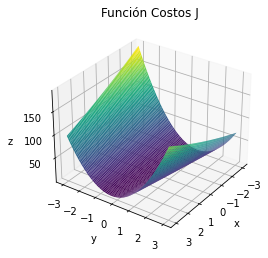

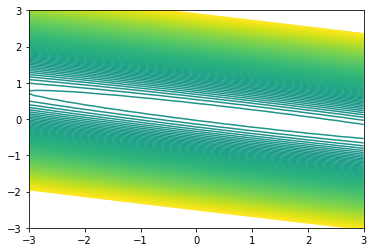

In [7]:
def J(b0, b1):
    c = 0
    for i in range(len(Y)):
        c+= (Y[i]-b0-b1*X[i])**2/(2*len(Y))
    return c

x = np.linspace(-3, 3, 70)
y = np.linspace(-3, 3, 70)

X1, Y1 = np.meshgrid(x, y)
Z = J(X1, Y1)
# graficamos la funcion de costos

ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Función Costos J')
ax.view_init(30, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#Grafica de contorno
cont = plt.figure()
plt.contour(X1,Y1,Z, levels= np.arange(-100,100,.8), cmap="viridis")

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.


La función convergió con beta: [0.69567582 0.07379435] en la iteración 8231


Text(0.5, 0, 'z')

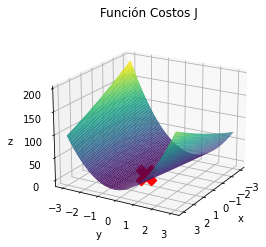

In [8]:
# puntos b_0 y b_1 
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(X,Y)
# punto donde esta J(b_0,b_1)
p= [r.historia['beta'][r.breaking_iteration-1][0], r.historia['beta'][r.breaking_iteration-1][1], r.historia["costo"][r.breaking_iteration-1]]
#Ponemos el punto en la grafica
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.scatter(p[0], p[1], p[2], linewidths=1.5, c="r", marker="X", s=400)
ax.set_title('Función Costos J')
ax.view_init(20, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.



interactive(children=(IntSlider(value=4111, description='iteracion', max=8230, min=1, step=10), Output()), _do…

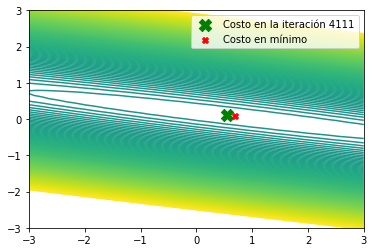

In [9]:
def CostoIteraciones(iteracion):
    cont = plt.figure()
    plt.contour(X1,Y1,Z, levels= np.arange(-100,100,.8), cmap="viridis")
    plt.scatter(r.historia['beta'][iteracion-1][0], r.historia['beta'][iteracion-1][1],c="g",s=150, marker="X", label=str("Costo en la iteración "+str(iteracion)))
    plt.scatter(p[0], p[1],c="r", marker="X", label="Costo en mínimo")
    plt.legend(loc="best")

interact(CostoIteraciones, iteracion=(1,r.i-1, 10));

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

interactive(children=(FloatSlider(value=0.0016, description='a', max=0.003, min=0.0003, step=0.0001), IntSlide…

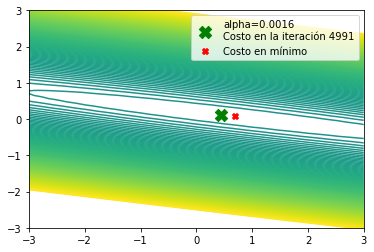

In [16]:
def ModA(a,iteracion):
    m = RegresionLineal(alpha= a, max_iters=10000000, tols=0)
    m.gradientDescent(X, Y)
    cont = plt.figure()
    plt.contour(X1,Y1,Z, levels= np.arange(-100,100,.8), cmap="viridis")
    plt.scatter(m.historia['beta'][iteracion-1][0], m.historia['beta'][iteracion-1][1],c="g",s=150, marker="X", label=str("alpha="+str(a)+"\nCosto en la iteración "+str(iteracion)))
    plt.scatter(p[0], p[1],c="r", marker="X", label="Costo en mínimo")
    plt.legend(loc="best")

interact(ModA, a=(.0003,.003,.0001), iteracion=(1,10000, 10));

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [11]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

## Problema 5

Use el archivo `radioactive_decay.dat`

In [12]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.